In [39]:
import re
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print
from rich.table import Table
from rich.console import Console

df = pd.read_csv("labeled_customer_data.csv")
if "Age_Group" in df.columns:
    age_order = sorted(df["Age_Group"].unique())
else:
    age_order = None

──────────────────────────────────────────── Demographic Visualization ────────────────────────────────────────────

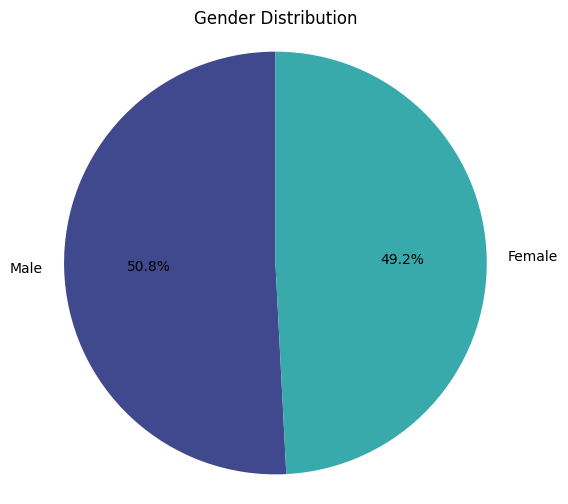

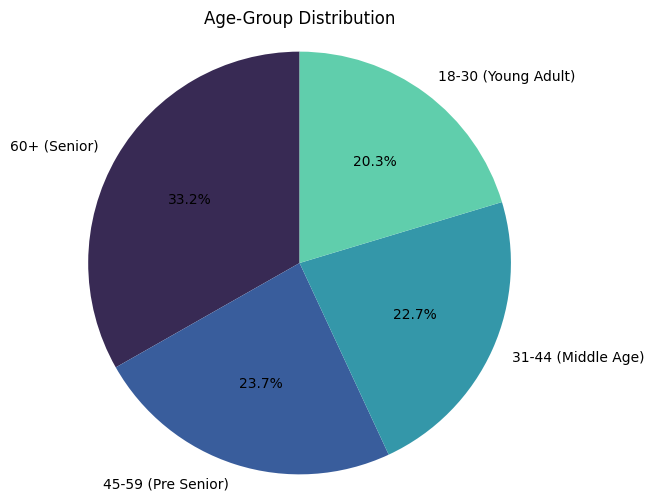

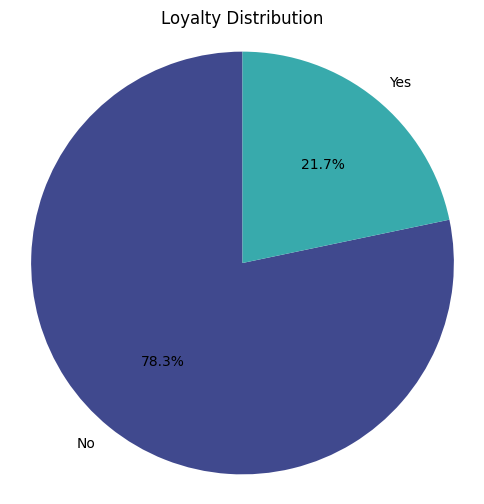

──────────────────────────────────────── Age Group and Gender Distribution ────────────────────────────────────────

C:\Users\prith\AppData\Local\Temp\ipykernel_25308\1124640362.py:59: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(


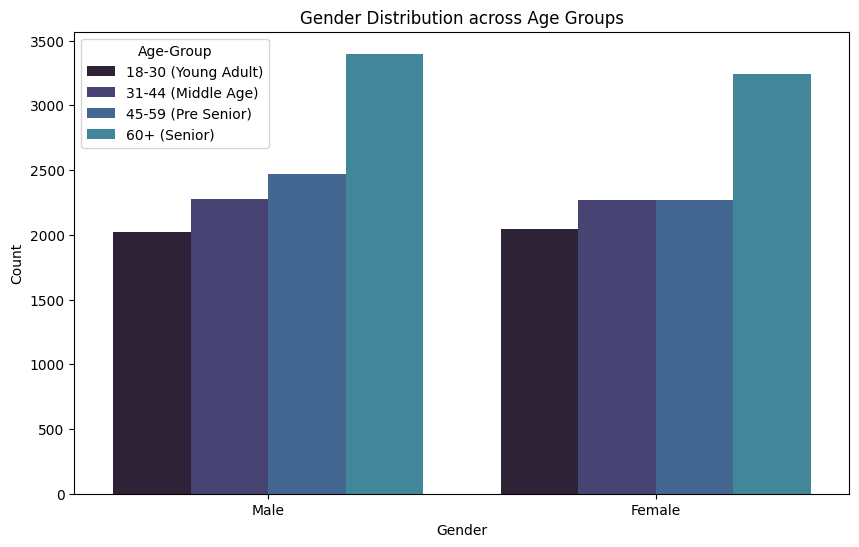

In [40]:
# Demographic Visualization
Console().rule("[bold yellow]Demographic Visualization")
# 1. Gender - Pie Chart
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("mako", len(gender_counts)),
)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

# 2. Age Group - Pie Chart
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns

age_counts = df["Age_Group"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("mako", len(age_counts)),
)
plt.title("Age-Group Distribution")
plt.axis("equal")
plt.show()

# 3. Loyalty Member - Pie Chart
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns

loyalty_counts = df["Loyalty Member"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    loyalty_counts,
    labels=loyalty_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("mako", len(loyalty_counts)),
)
plt.title("Loyalty Distribution")
plt.axis("equal")
plt.show()

# 4. Gender Distribution across Age Groups - Bar Chart
Console().rule("[bold yellow]Age Group and Gender Distribution")
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x="Gender",
    hue="Age_Group",
    palette=sns.color_palette("mako"),
    hue_order=age_order,
)
plt.title("Gender Distribution across Age Groups")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Age-Group")

──────────────────────────────── Electronic Product Sales Distribution (2023-2024) ────────────────────────────────

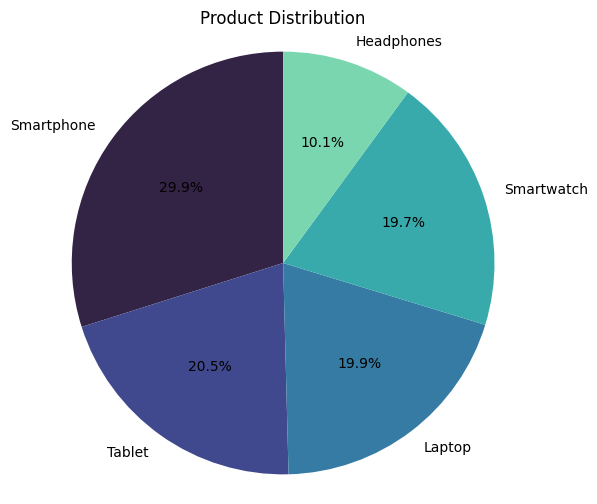

───────────────────────────────────── Product Sales Count by Type (2023-2024) ─────────────────────────────────────

C:\Users\prith\AppData\Local\Temp\ipykernel_25308\241777231.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Product Type", palette=sns.color_palette("mako"))
C:\Users\prith\AppData\Local\Temp\ipykernel_25308\241777231.py:25: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(data=df, x="Product Type", palette=sns.color_palette("mako"))


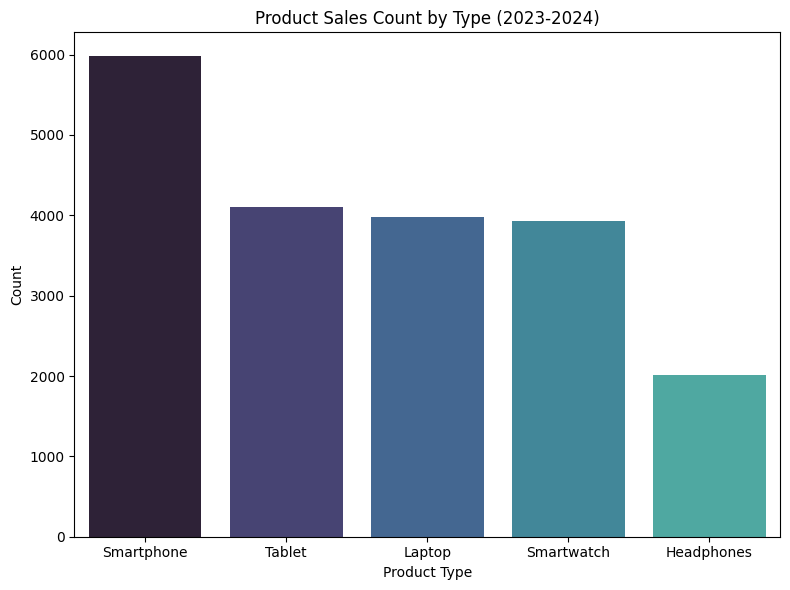

In [41]:
# Sales Behaviour & Trend Visualization
# 2. Product Sales - Pie Chart
Console().rule("[bold yellow]Electronic Product Sales Distribution (2023-2024)")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns

product_counts = df["Product Type"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    product_counts,
    labels=product_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("mako", len(product_counts)),
)
plt.title("Product Distribution")
plt.axis("equal")
plt.show()

# 2. Product Transaction Total
Console().rule("[bold yellow]Product Sales Count by Type (2023-2024)")
Total_Transaction = df["Total Price"].sum()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Product Type", palette=sns.color_palette("mako"))
plt.title("Product Sales Count by Type (2023-2024)")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
gender_palettes = {"Male": "PuBu", "Female": "RdPu"}

In [ ]:
# 2. Rating Produk by AgeGroup and Gender

# 3. Status Order by AgeGroup and Gender

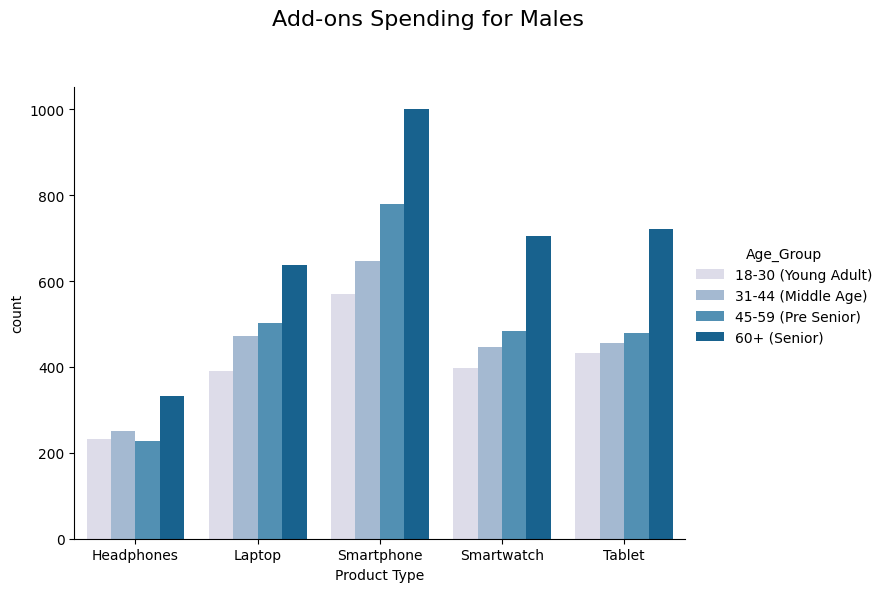

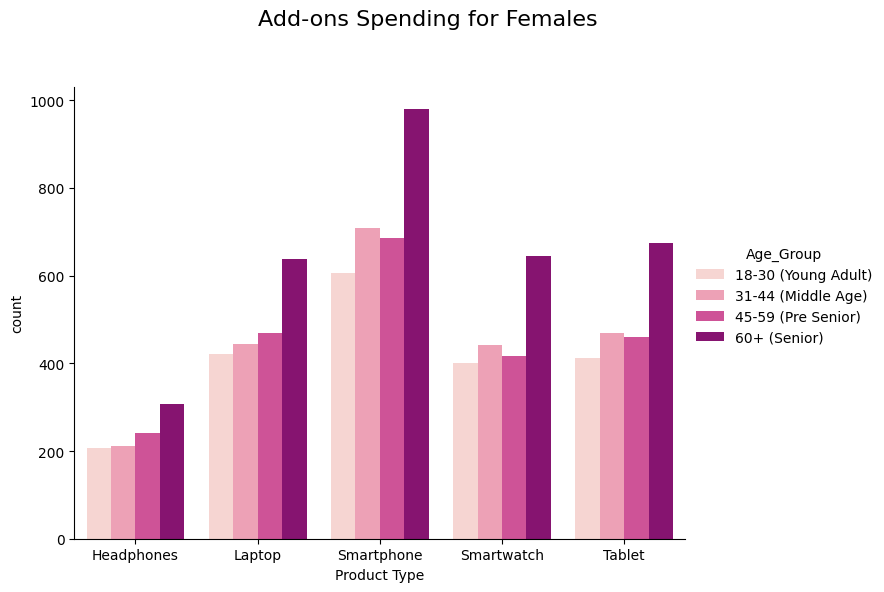

In [73]:
# 2. Product Sales based on Age Group
for gender, palette in gender_palettes.items():
    filtered_df = df[df["Gender"] == gender]
    sns.catplot(
        data=filtered_df,
        x="Product Type",
        hue="Age_Group",
        legend="full",
        kind="count",
        palette=palette,
        hue_order=age_order,
        height=6,
        order=sorted(df["Product Type"].unique()),
        aspect=1.2,
    )
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f"Add-ons Spending for {gender}s", fontsize=16)

<Figure size 1000x600 with 0 Axes>

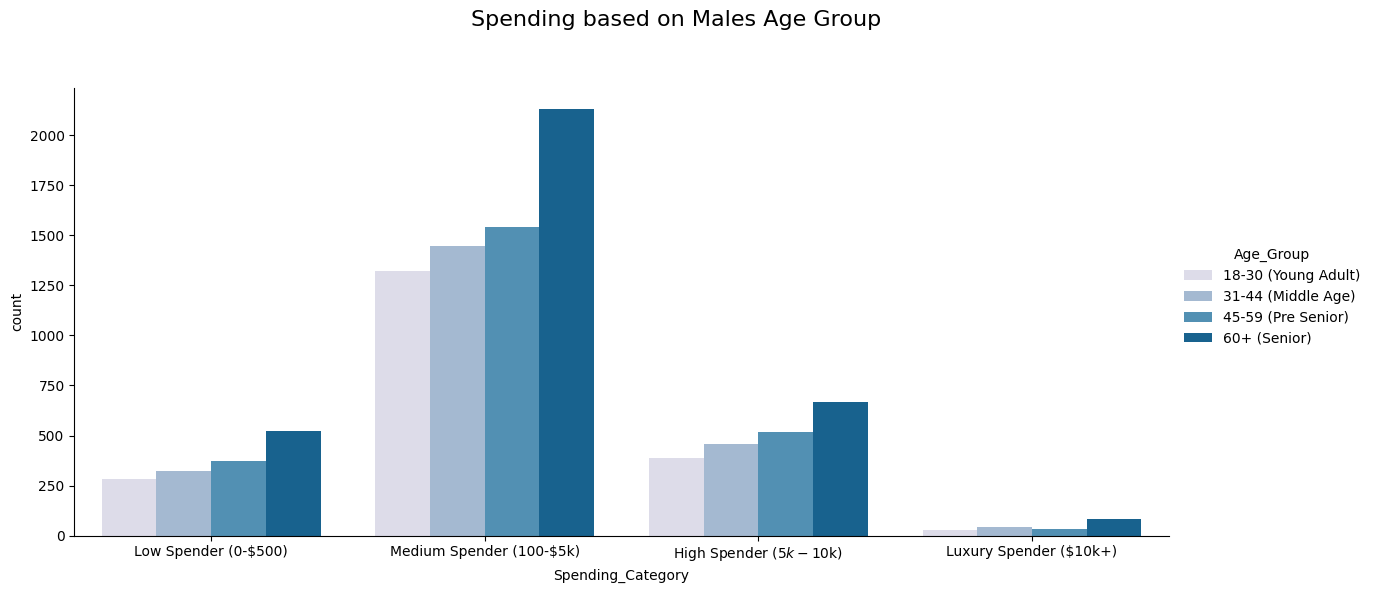

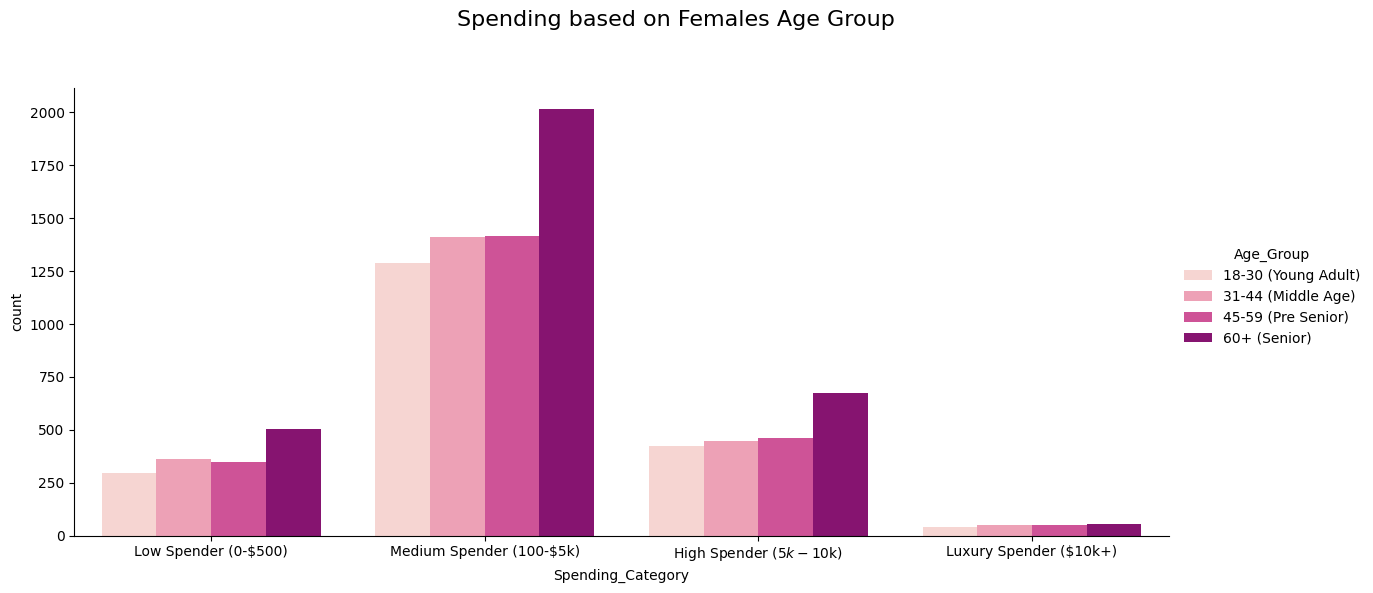

In [75]:
# Spending Habit Visualization per Age-Group by Gender - bar Chart
spending_order = [
    "Low Spender (0-$500)",
    "Medium Spender (100-$5k)",
    "High Spender ($5k-$10k)",
    "Luxury Spender ($10k+)",
]

plt.figure(figsize=(10, 6))
for gender, palette in gender_palettes.items():
    filtered_df = df[df["Gender"] == gender]
    sns.catplot(
        data=filtered_df,
        x="Spending_Category",
        hue="Age_Group",
        kind="count",
        palette=palette,
        hue_order=age_order,
        height=6,
        order=spending_order,
        aspect=2,
    )
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f"Spending based on {gender}s Age Group", fontsize=16)
    plt.show()

<Figure size 1000x600 with 0 Axes>

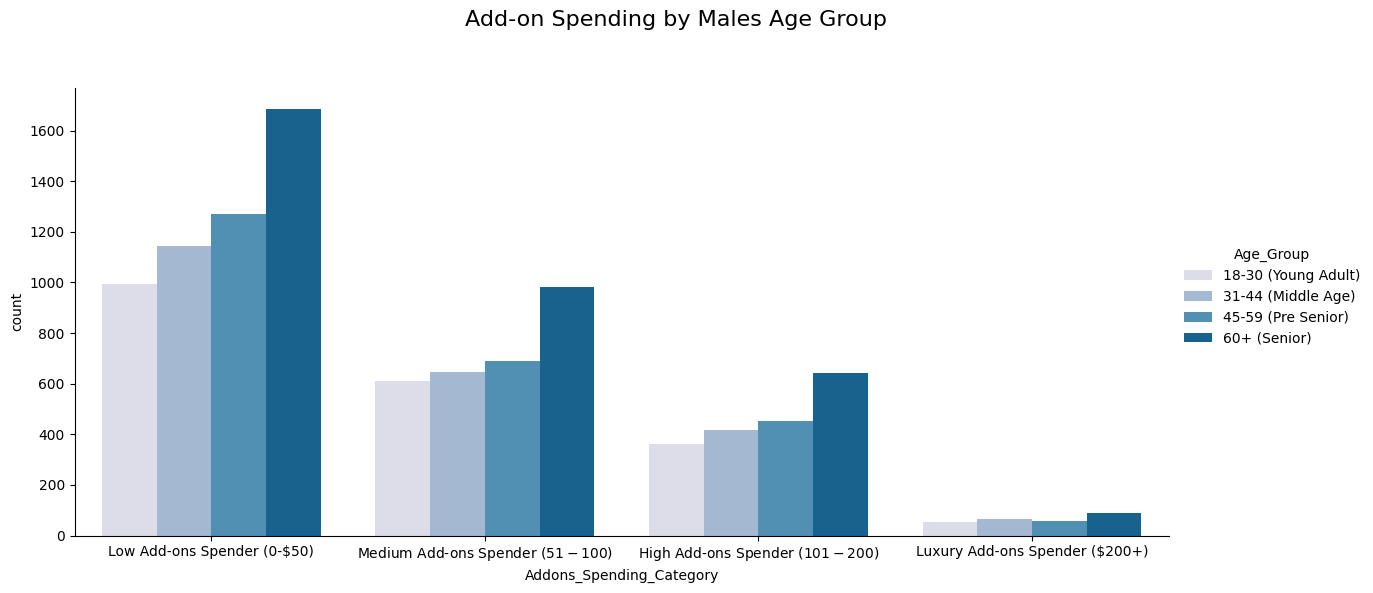

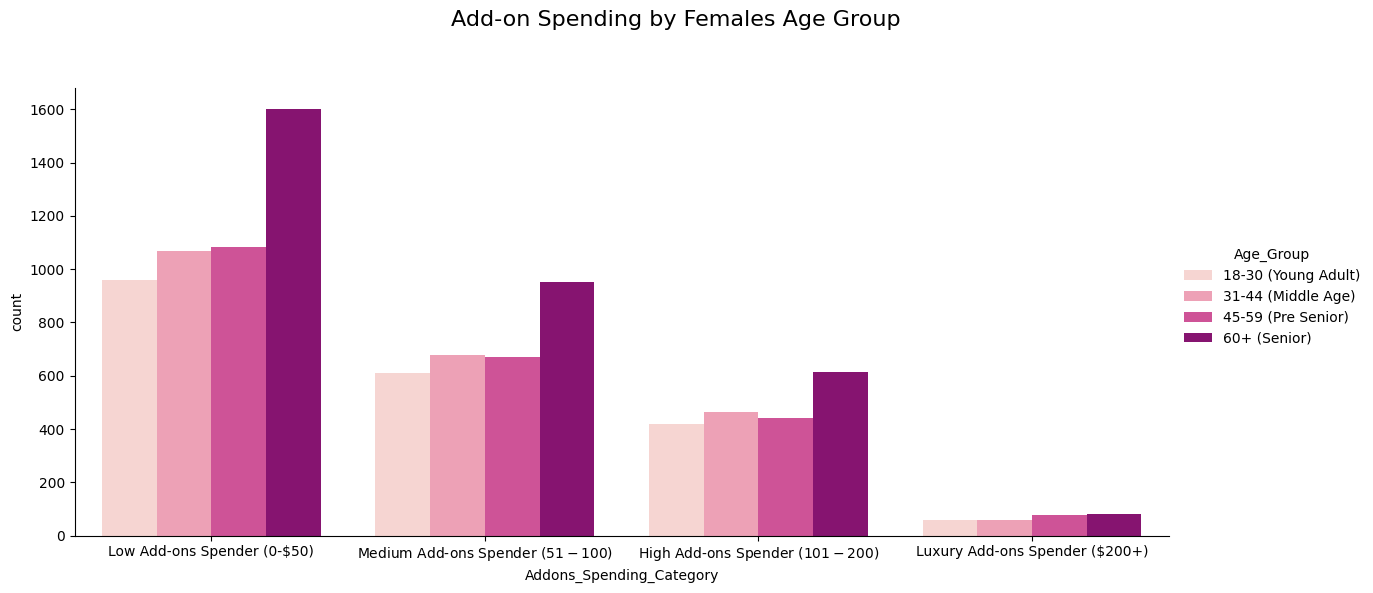

In [76]:
# Adds On Spending Habit Visualization per Age-Group by Gender - bar Chart
plt.figure(figsize=(10, 6))
for gender, palette in gender_palettes.items():
    filtered_df = df[df["Gender"] == gender]
    sns.catplot(
        data=filtered_df,
        x="Addons_Spending_Category",
        hue="Age_Group",
        kind="count",
        palette=palette,
        hue_order=age_order,
        order=df["Addons_Spending_Category"].value_counts().index,
        height=6,
        aspect=2,
    )
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f"Add-on Spending by {gender}s Age Group", fontsize=16)
    plt.show()

────────────────────────────────────── Sales Behaviour & Trend Visualization ──────────────────────────────────────

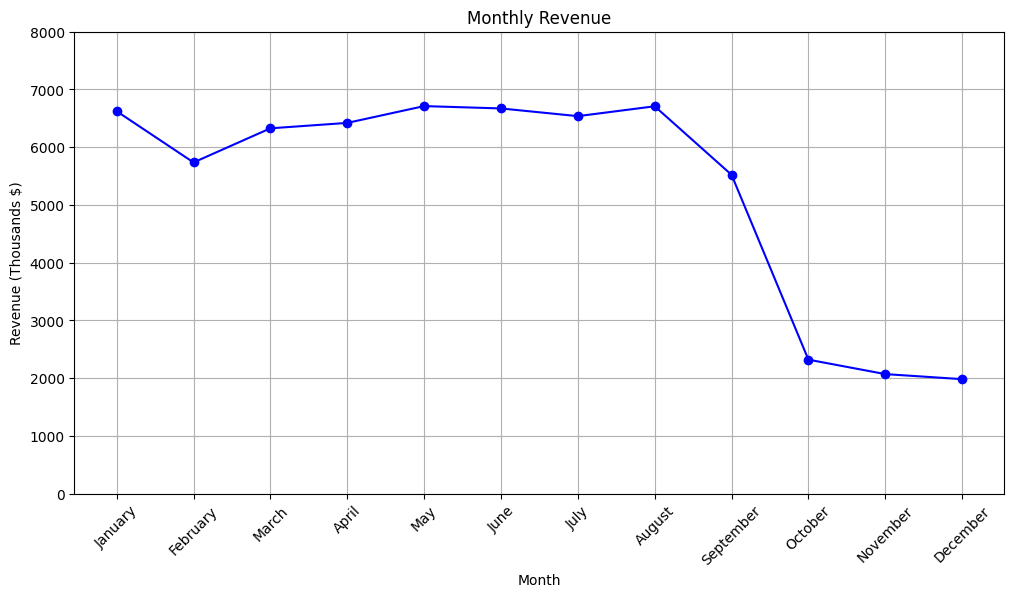

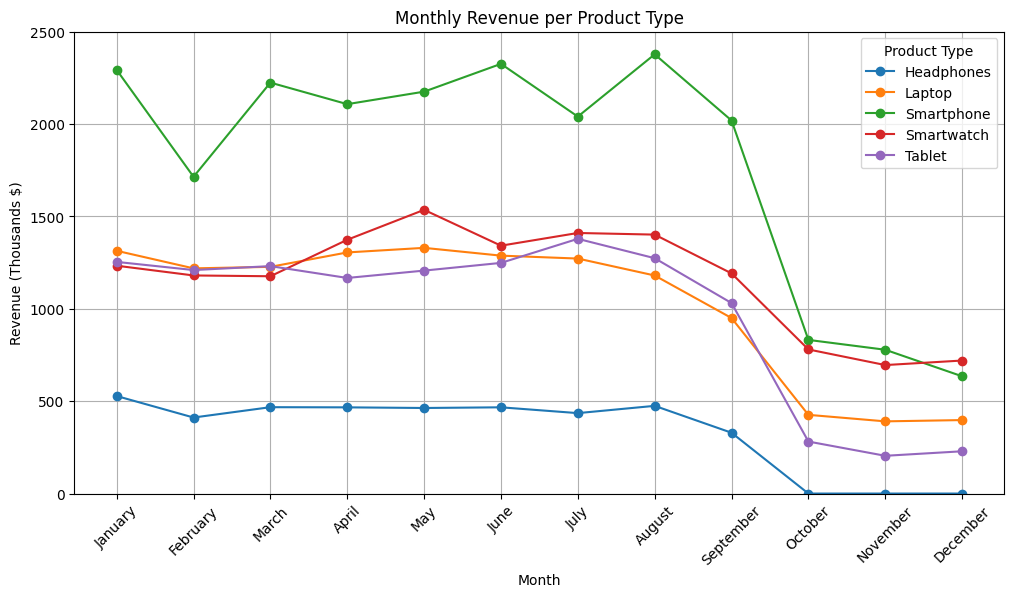

In [47]:
from matplotlib.ticker import FuncFormatter

Console().rule("[bold yellow]Sales Behaviour & Trend Visualization")
# 4. Line Chart: Monthly Revenue
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df["Purchase Month"] = df["Purchase Date"].dt.month_name()
monthly_revenue = (
    df.groupby("Purchase Month")["Total Price"]
    .sum()
    .reindex(
        [
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ]
    )
)
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue / 1000, marker="o", color="b")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue (Thousands $)")
plt.gca().set_ylim(0, 8000)
plt.gca().set_yticks(np.arange(0, 8001, 1000))
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 5. Line chart: Monthly Revenue per Product Type
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df["Purchase Month"] = df["Purchase Date"].dt.month_name()

# Group by Purchase Month and Product Type, sum the Total Price
monthly_revenue = (
    df.groupby(["Purchase Month", "Product Type"])["Total Price"]
    .sum()
    .unstack(fill_value=0)
    .reindex(
        [
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ]
    )
)

plt.figure(figsize=(12, 6))
for product in monthly_revenue.columns:
    plt.plot(
        monthly_revenue.index,
        monthly_revenue[product] / 1000,
        marker="o",
        label=product,
    )
sns.barplot(pallete=sns.color_palette("mako"))
plt.title("Monthly Revenue per Product Type")
plt.xlabel("Month")
plt.ylabel("Revenue (Thousands $)")
plt.gca().set_ylim(0, 2500)
plt.gca().set_yticks(np.arange(0, 2501, 500))
plt.xticks(rotation=45)
plt.legend(title="Product Type")
plt.grid()
plt.show()